# Python Visulization of SpringSaLaD Outputs

This notebook demonstrates different ways visualize the CSV outputs generate by SpringSaLaD.

In [1]:
#Import necessary functions and data
from Visualization import *
from data_locator import data_file_finder
from display_info import *
from Project_reader import Describe_input_file
from MolDraw.MolDraw_exec import display_molecules

In [2]:
#Create the relative path to your desired SIMULATIONS or FOLDER directory
search_directory = os.path.join('Examples','Nephrin-Nck-NWasp','Final_version_test_SIMULATIONS', 'Simulation0_SIM_SIMULATIONS')

#Get a description of the input file in that directory
Describe_input_file(search_directory, reactions=True, kinetics=True)

Moleclues:

MOLECULE: "NWASP" (Initial Count: 10)
This molecule has 5 site types: dom1, linker, PRM, dom3, dom2

It consists of 16 connected sites:
Site 0 (Intracellular) of type "PRM"
Site 1 (Intracellular) of type "linker"
Site 2 (Intracellular) of type "PRM"
Site 3 (Intracellular) of type "linker"
Site 4 (Intracellular) of type "PRM"
Site 5 (Intracellular) of type "linker"
Site 6 (Intracellular) of type "PRM"
Site 7 (Intracellular) of type "linker"
Site 8 (Intracellular) of type "PRM"
Site 9 (Intracellular) of type "linker"
Site 10 (Intracellular) of type "PRM"
Site 11 (Intracellular) of type "dom1"
Site 12 (Intracellular) of type "dom3"
Site 13 (Intracellular) of type "dom2"
Site 14 (Intracellular) of type "linker"
Site 15 (Intracellular) of type "linker"

It has 15 total links between sites:
Site 0 is connected to site 13, site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1, site 3
Site 3 is connected to site 2, site 4
Site 4 is connected to site 3, site 5
S

NWASP:


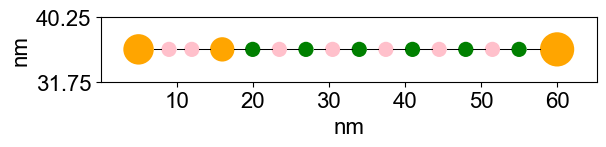

NCK:


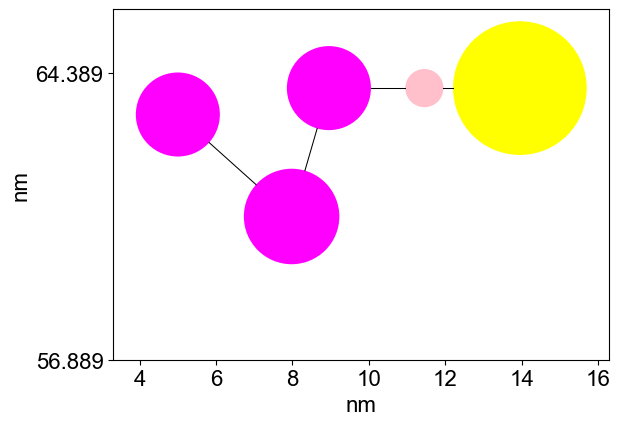

NEPHRIN:


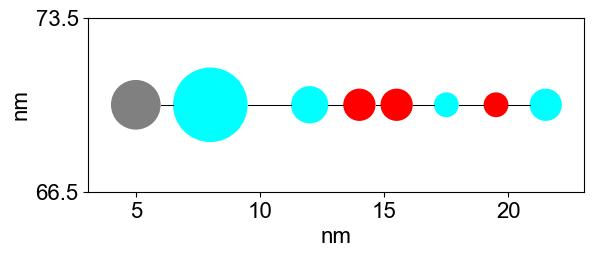

In [3]:
display_molecules(search_directory)

In [4]:
#Choose a file in the data folder by giving a search term (some part of the file name) or the full file name
path = data_file_finder(search_directory, ['data'], search_term='BondCounts', file_name=None)
file_info(path, list_neighbors=True)

Selected File:
Simulation0_SIM_AverageBondCounts_0_4.csv

Parent Directory:
Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data

Average Files:
BondCounts_0_4.csv                                  2.0 KB
MoleculeCounts_0_4.csv                              2.6 KB
SiteProperties_NCK_Site_0_0_4.csv                   1.5 KB
SiteProperties_NCK_Site_1_0_4.csv                   1.4 KB
SiteProperties_NCK_Site_2_0_4.csv                   1.5 KB
SiteProperties_NCK_Site_3_0_4.csv                   1.8 KB
SiteProperties_NCK_Site_4_0_4.csv                   819.0 bytes
SiteProperties_NEPHRIN_Site_0_0_4.csv               793.0 bytes
SiteProperties_NEPHRIN_Site_1_0_4.csv               793.0 bytes
SiteProperties_NEPHRIN_Site_2_0_4.csv               793.0 bytes
SiteProperties_NEPHRIN_Site_3_0_4.csv               1.4 KB
SiteProperties_NEPHRIN_Site_4_0_4.csv               1.4 KB
SiteProperties_NEPHRIN_Site_5_0_4.csv               793.0 bytes
Si

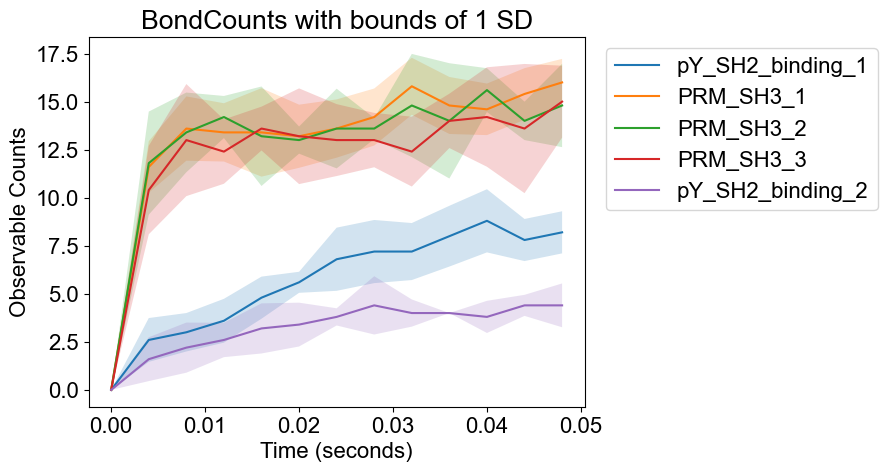

Columns:
0: Time
1: pY_SH2 binding_1
2: PRM_SH3_1
3: PRM_SH3_2
4: PRM_SH3_3
5: pY_SH2_binding_2

List of indicies:
[0, 1, 2, 3, 4, 5]


In [5]:
#Plot the selected data over time
Plotter.plot(path)

#Get a list of columns and their respective indicies
column_info(path)

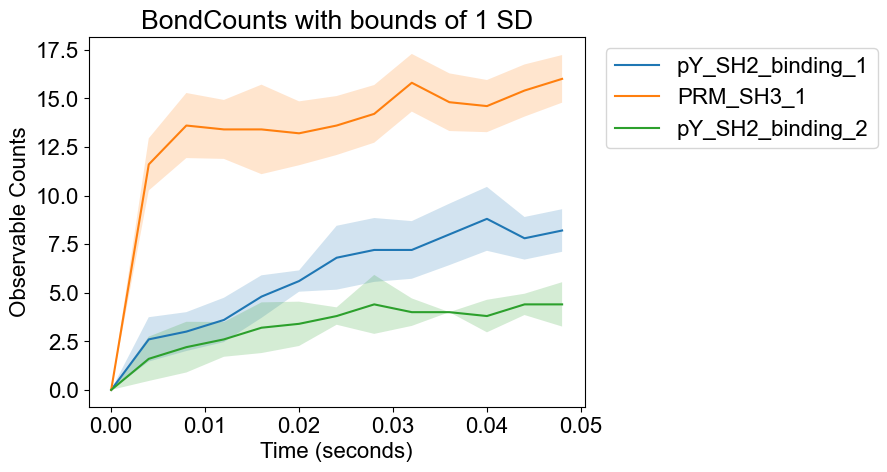

In [6]:
#Select only the columns you want to see graphed
Plotter.plot(path, [1, 2, 5])

Columns:
0: Time
1: TOTAL NWASP
2: FREE NWASP
3: BOUND NWASP
4: TOTAL NCK
5: FREE NCK
6: BOUND NCK
7: TOTAL NEPHRIN
8: FREE NEPHRIN
9: BOUND NEPHRIN

List of indicies:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


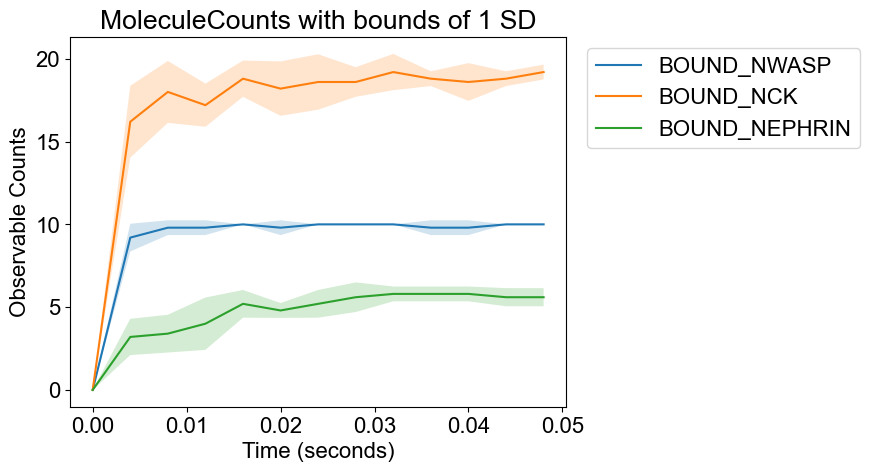

In [7]:
#Change the data file
path = data_file_finder(search_directory, ['data'], 'MoleculeCounts')
column_info(path)
Plotter.plot(path, [3,6,9])

Sites:
0: PRM of NWASP
1: linker of NWASP
2: dom1 of NWASP
3: dom3 of NWASP
4: dom2 of NWASP
5: SH3_1 of NCK
6: SH3_2 of NCK
7: SH3_3 of NCK
8: SH2 of NCK
9: linker of NCK
10: Anchor of NEPHRIN
11: dom1 of NEPHRIN
12: dom2 of NEPHRIN
13: pTyr_1_2 of NEPHRIN
14: linker of NEPHRIN
15: pTyr_3 of NEPHRIN
16: lin_dom of NEPHRIN

List of indicies:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


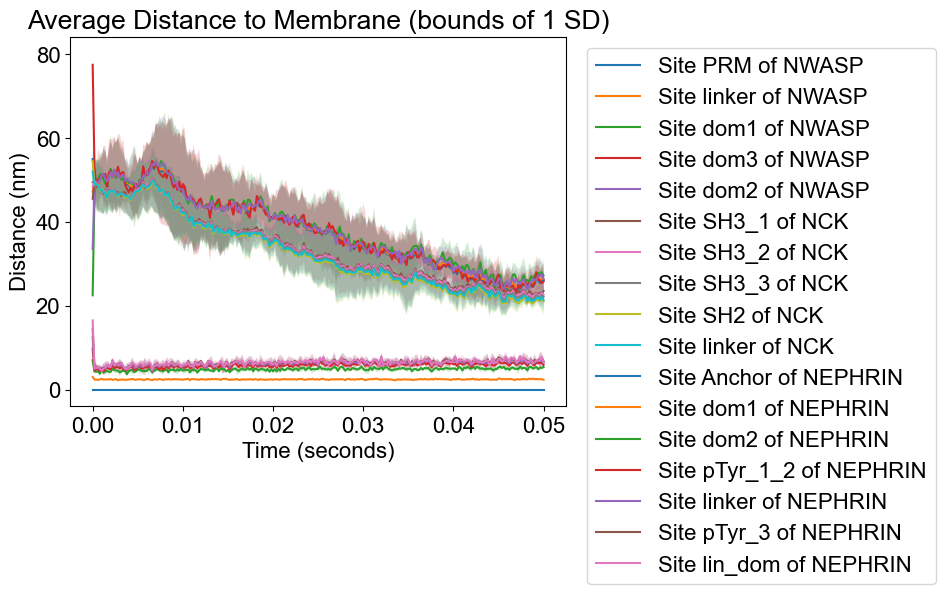

In [8]:
#Show the average Z position of each type of site
Average_z_pos.plot(search_directory, indicies=[], verbose=True, legend_right=True, list_options=True, mode='site', fill=True)

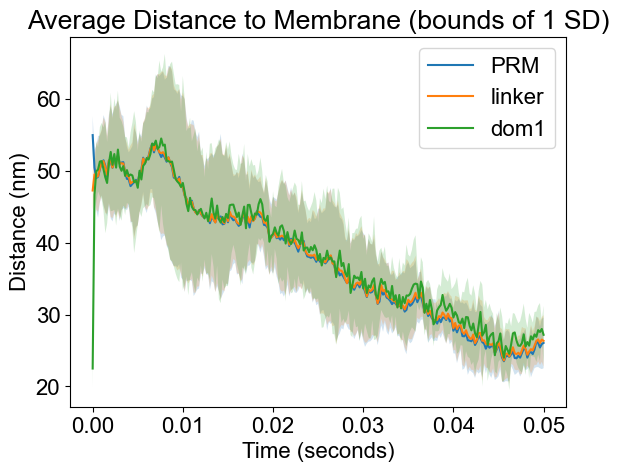

In [16]:
#Shorten legend with Verbose=False and set list_options=False so only the graph is displayed
Average_z_pos.plot(search_directory, indicies=[0,1,2], verbose=False, legend_right=False, list_options=False, mode='site', fill=True)


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100%


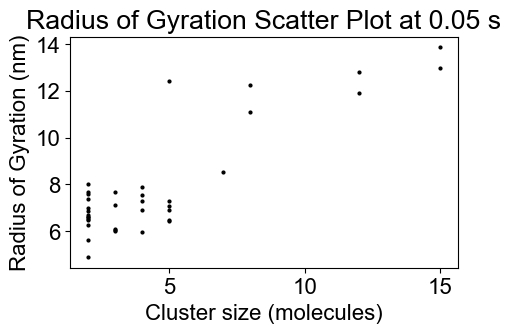

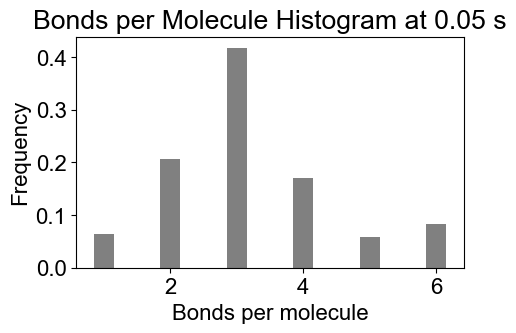

Execution time : 0.7647 secs


In [10]:
#View cluster size distribution (shows last data point by default)
Spatial_Analysis.plot(search_directory, times=[])


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100%


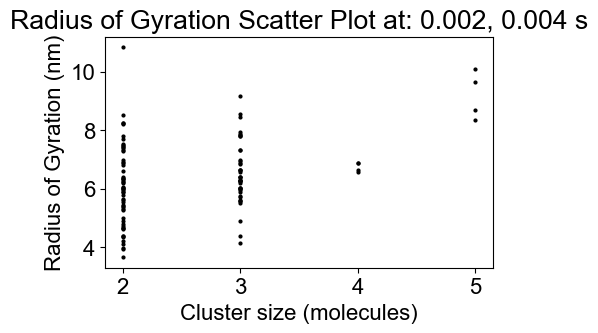

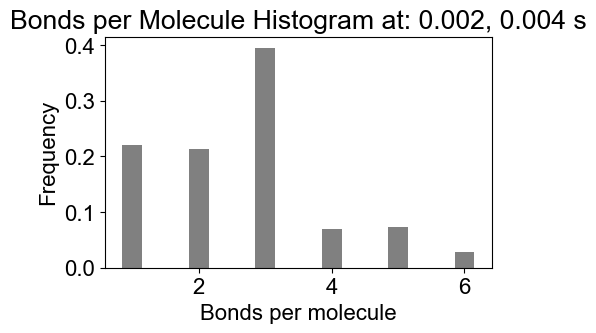

Execution time : 0.8288 secs


In [11]:
#Select a specific point in time
Spatial_Analysis.plot(search_directory, [0.002, 0.004])

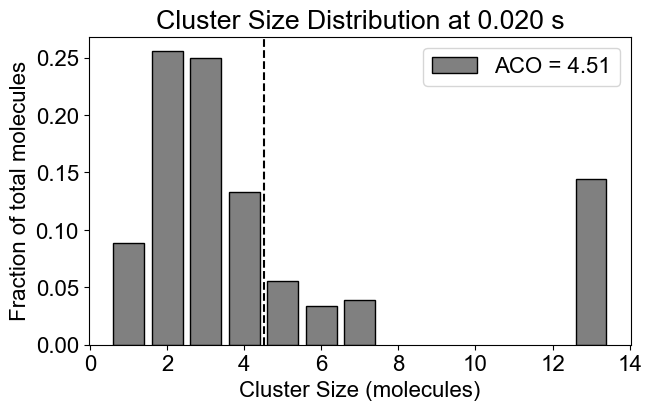

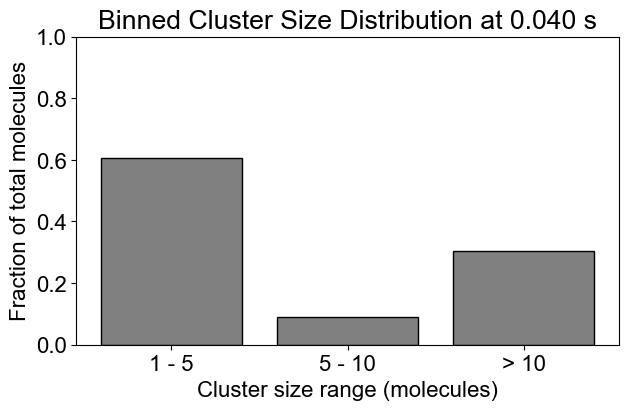

In [12]:
#View cluster size distribution histogram at a particular point in time with or without bins
Histogram.plot(search_directory, [], 0.02)
Histogram.plot(search_directory, [1,5,10], 0.04)

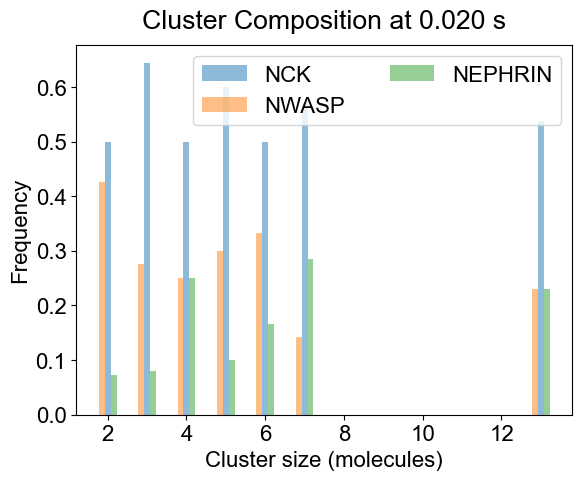

In [13]:
Cluster_comp.plot(search_directory, 0.02)

Class : CrossLinkIndex
System : Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\Simulation0_SIM.txt
Calculating SI ...
Progress : [****************************************] 100%
Complete Trajectories : 5
CS array: 50
SI_array: 50
Execution time : 0.5945 secs


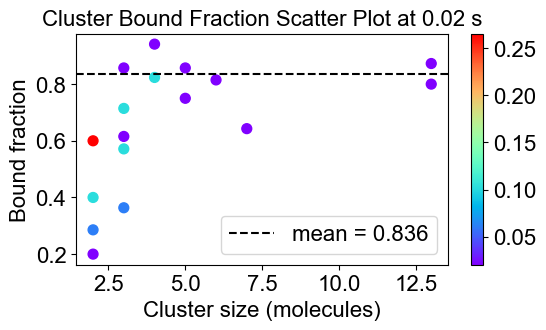

In [14]:
Bound_fraction.plot(search_directory, [0.02])

In [15]:
#data_selection options are 'rg' (cluster radius of gyration), 'cs' (cluster size or number of molecules in a cluster), and 'mr' (maximum cluster radius relative to cluster COM)
#indicies selects maximuim (0), average (1), or both in the plot below. It's both by default
#Warning: computationally intensive for larger simulations
Spatial_Analysis.time_course(search_directory, data_selection='rg', indicies=[0,1], size_threshold=1)

KeyboardInterrupt: 

In [ ]:
Spatial_Analysis.time_course(search_directory, data_selection='cs', indicies=[0,1], size_threshold=1)

In [ ]:
Spatial_Analysis.time_course(search_directory, data_selection='mr', indicies=[0,1], size_threshold=1)